In [1]:
## Set file date name for use.
filedate = 'Jan162019'

In [2]:
## Bring in needed mod, pandas
import pandas as pd

In [3]:
## Set file path name, from basic filtering. Should have basic.csv as the end
file_path = '../DATA/Tecan_qtlruns_%s_curated.csv.gz'%(filedate)

In [4]:
## Bring in data
tecan = pd.read_csv(file_path,index_col=0)

In [5]:
## Get column names
colnames = tecan.columns.tolist()

In [6]:
## Get the first time pt index
zero_ix = colnames.index('0s')

In [7]:
## Seperate columns
infos = colnames[:zero_ix]
timepts = colnames[zero_ix:]

In [8]:
## Check work
assert timepts[0] == '0s'

In [9]:
## Set the first two timepoints to zero
tecan.loc[:,timepts[:2]] = 0

In [10]:
## Make the baseline dataframe, this is the first hour and a 15min, post the first half hour
baselinedf = tecan[timepts[2:7]].copy()

In [11]:
## Check shape of baseline dataframe
baselinedf.shape

(5340, 5)

In [12]:
## Set all of those values in baseline near zero to above zero
baselinedf[baselinedf<0] = 0

In [13]:
## Calculate the per sample baseline
baselines = baselinedf.mean(axis=1).values

In [14]:
## Bring in matplot lib
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
## Set coloring and background
#plt.style.use(['dark_background','tableau-colorblind10'])
plt.style.use('tableau-colorblind10')

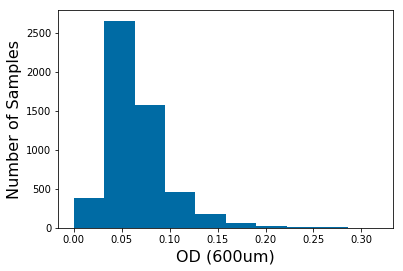

In [16]:
## Plot histogram of baseline values
plt.hist(baselines);
plt.ylabel('Number of Samples',fontsize=16);
plt.xlabel('OD (600um)',fontsize=16);

In [17]:
## Subtract baselines
tecan_tpt = tecan[timepts].T.subtract(baselines).T

In [18]:
## Set values below zero in baselined data to zero
tecan_tpt[tecan_tpt<0] = 0

In [19]:
## Set first 7 time points, 5 in baseline, 2 in dropped values to zero
tecan_tpt[tecan_tpt.columns.tolist()[:7]] = 0.0

In [20]:
## Make filtered dataframe
fdf = pd.concat([tecan[infos],tecan_tpt],axis=1)

In [21]:
## Save dataframe
fdf.to_csv('../FILES/'+file_path.split('/')[-1].split('.csv')[0]+'_baselined.csv')